### OpenAI Gym. LunarLander-v2 environment

Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. 
Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points.
If lander moves away from landing pad it loses reward back. 
Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. 
Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. 
Landing outside landing pad is possible. 
Fuel is infinite, so an agent can learn to fly and then land on its first attempt. 
Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Problem:**  
To guide the lander to the center of the landing pad and zero speed, maintaining correct orientation (both legs pointing down)  

**State vector (s):**  
* s[0] - x coordinate  
* s[1] - y coordinate  
* s[2] - x speed  
* s[3] - y speed  
* s[4] - angle  
* s[5] - angular speed  
* s[6] - if first leg has contact  
* s[7] - if second leg has contact  


**Possible actions:**   
- 0 - Do nothing  
- 1 - Fire left engine  
- 2 - Fire main engine  
- 3 - Fire right engine  

**Rewards:**
*   +100..140 for landing on the pad
*   +100 for successful landing
*   +10 for each led ground contact
*   -100 for crashing into the ground
*   -0.3 for each firing of the main engine

---

### Keyboard control

In [7]:
! python lunar_lander_keyboard.py

ACTIONS=4
Press keys 1 2 3 ... to take actions 1 2 3 ...
No keys pressed is taking action 0
reward -0.260
reward -0.334
reward -0.364
reward -0.400
reward -0.438
reward -0.479
reward -0.523
reward -0.570
reward -0.618
reward -0.667
reward -0.717
reward -0.768
reward -0.818
reward -0.868
reward -0.916
reward -0.963
reward -1.008
reward -1.050
reward -1.090
reward -1.127
reward -1.160
reward -1.190
reward -1.217
reward -1.239
reward -1.287
reward -1.307
reward -1.286
reward -1.295
reward -1.301
reward -1.304
reward -1.303
reward 0.030
reward -1.270
reward -1.681
reward -1.180
reward -0.941
reward -1.130
reward -0.390
reward -0.526
reward -0.823
reward -0.417
reward -1.165
reward 0.216
reward -0.762
reward -2.313
reward -2.775
reward -2.960
reward -3.123
reward -2.095
reward -0.795
reward -1.041
reward -0.631
reward -0.240
reward -0.304
reward 0.171
reward 0.372
reward 0.682
reward 0.900
reward 0.977
reward 1.313
reward 1.209
reward 1.347
reward 1.631
reward 1.816
reward 1.848
reward 2.28

---

### Heuristic solution (fuzzy controller)

In [11]:
!python lunar_lander_heuristic.py

observations: -0.00 +1.41 -0.20 +0.06 +0.00 +0.00 +0.00 +0.00
step 0 total_reward +1.72
observations: -0.04 +1.31 -0.18 -0.47 -0.07 -0.07 +0.00 +0.00
step 20 total_reward -24.49
observations: -0.08 +0.98 -0.18 -1.01 -0.13 -0.07 +0.00 +0.00
step 40 total_reward -49.43
observations: -0.09 +0.58 +0.01 -0.71 -0.17 -0.03 +0.00 +0.00
step 60 total_reward +11.92
observations: -0.08 +0.32 +0.20 -0.40 -0.13 +0.10 +0.00 +0.00
step 80 total_reward +62.94
observations: -0.03 +0.18 +0.24 -0.25 -0.00 +0.13 +0.00 +0.00
step 100 total_reward +97.54
observations: +0.02 +0.08 +0.26 -0.19 +0.13 +0.12 +0.00 +0.00
step 120 total_reward +92.87
observations: +0.06 +0.02 +0.12 -0.06 +0.17 -0.27 +0.00 +1.00
step 140 total_reward +115.66
observations: +0.07 -0.00 +0.03 +0.07 +0.01 +0.00 +1.00 +1.00
step 160 total_reward +144.92
observations: +0.07 -0.00 +0.00 +0.00 +0.00 -0.00 +1.00 +1.00
step 180 total_reward +152.77
observations: +0.07 -0.00 -0.00 -0.00 +0.00 +0.00 +1.00 +1.00
step 200 total_reward +152.85
ob

---

### Q-table solution

$\epsilon$-greedy policy  

TD(0) update:  
![q-value equation](images/math.svg)

**Hyperparameters:**  
*   $\alpha$ (alpha) is the learning rate (0<$\Large \alpha$<=1) 
*   $\gamma$ (gamma) is the discount factor ($0 \leq \gamma \leq 1$) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
*   $\epsilon$ (epsilon) is the probability of random action. In our case we start from full exploration (epsilon=1.0) and decrease the value to epsilon_min (=0.01) as episodes pass.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 9]
from lunar_lander_qtable_td import QTable, create_env
env = create_env()

In [13]:
# Train the agent on N episodes
agent = QTable(env, alpha=0.1, gamma=.99, epsilon=1.0, epsilon_min=.01, epsilon_max=1.0, epsilon_decay=0.996)

In [30]:
loss = agent.train(20000)

episode: 0/5001, total_reward: -7.889476772890944
Average over last 100 episode: -7.89 

episode: 1/5001, total_reward: -0.11617540892142131
Average over last 100 episode: -4.00 

episode: 2/5001, total_reward: 42.85769723697621
Average over last 100 episode: 11.62 

episode: 3/5001, total_reward: -196.54240860681415
Average over last 100 episode: -40.42 

episode: 4/5001, total_reward: -24.165197293219578
Average over last 100 episode: -37.17 

episode: 5/5001, total_reward: 21.385709757489593
Average over last 100 episode: -27.41 

episode: 6/5001, total_reward: -26.82641063612391
Average over last 100 episode: -27.33 

episode: 7/5001, total_reward: 141.54280327321703
Average over last 100 episode: -6.22 

episode: 8/5001, total_reward: -10.300491296328389
Average over last 100 episode: -6.67 

episode: 9/5001, total_reward: 35.45534935199012
Average over last 100 episode: -2.46 

episode: 10/5001, total_reward: -37.19204381442152
Average over last 100 episode: -5.62 

episode: 11/5

### Final reward

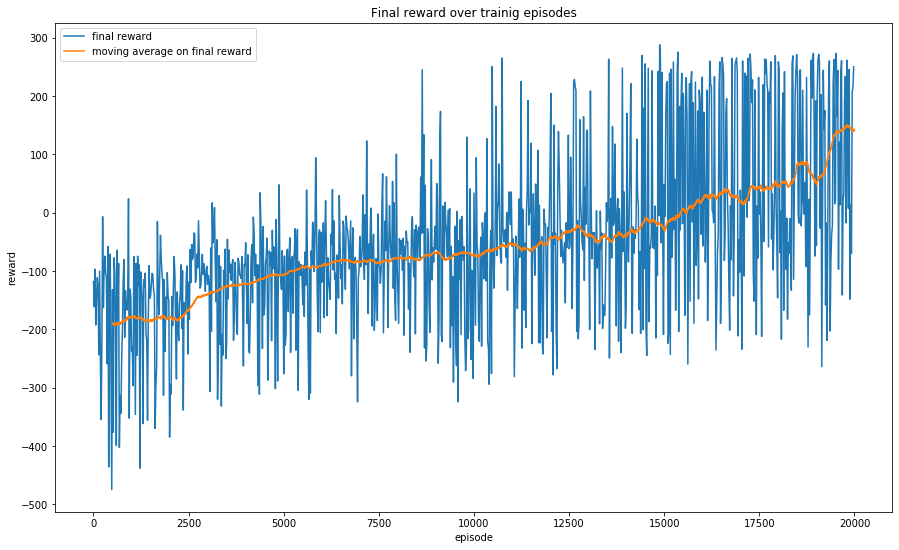

In [15]:
reward = np.load(r'qtbl_td_reward_20000.npy')
window = 500
freq = 20
avg_reward = pd.DataFrame(reward).rolling(window).mean()
plt.plot(np.arange(1, len(reward)+1, freq), reward[::freq], label='final reward')
plt.plot(avg_reward, label='moving average on final reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('Final reward over trainig episodes')
plt.legend()
plt.show();

### Q-table visualization

In [91]:
# Load q-tables of agents with different performance
agent_1k = QTable(env)
# agent_1k.load_qtable(r'checkpoints\qtbl_td_e1000.npy')
agent_1k.load_qtable(r'checkpoints\qtbl_td_e1000.npy')
agent_20k = QTable(env)
# agent_20k.load_qtable(r'checkpoints\qtbl_td_e20000.npy')
agent_20k.load_qtable(r'checkpoints\qtbl_td_e20000.npy')
qtbl_1k = agent_1k.qtbl_2d
qtbl_20k = agent_20k.qtbl_2d

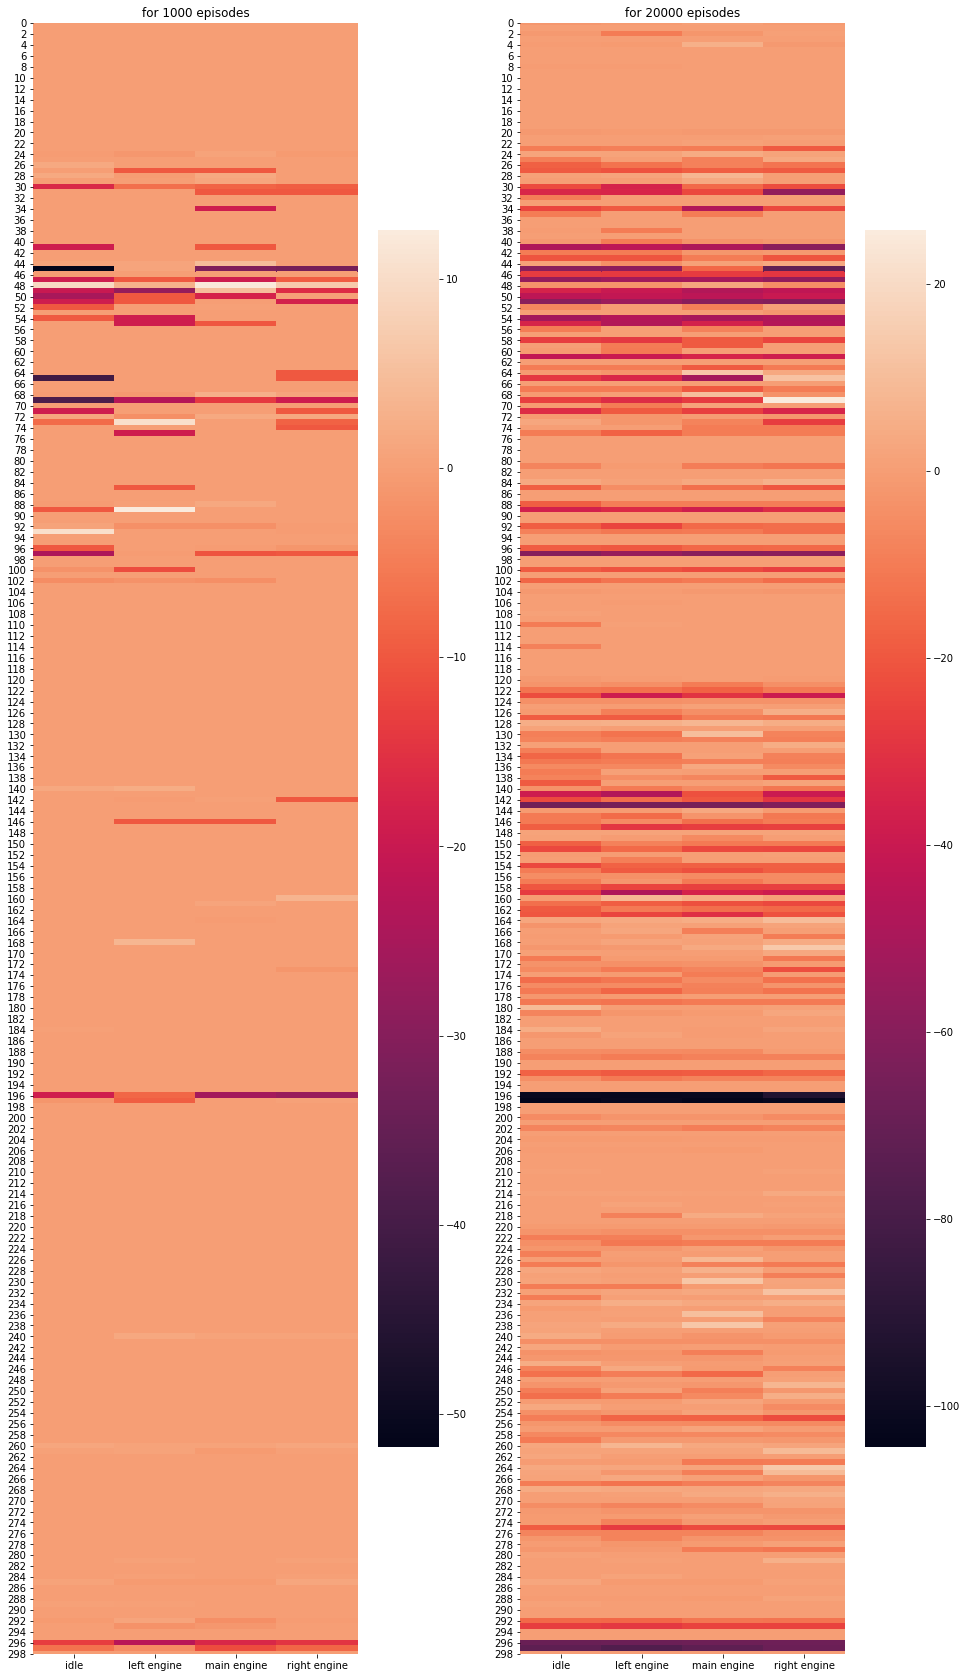

In [137]:
fig, ax = plt.subplots(1,2, figsize=(16,30)) 
actions = ['idle', 'left engine', 'main engine', 'right engine']
start_idx = 18000
n_samples = 300
ax[0].set_title('for 1000 episodes')
ax[1].set_title('for 20000 episodes')
x_1k = sns.heatmap(qtbl_1k[start_idx:start_idx+n_samples], xticklabels=actions, ax=ax[0])
x_20k = sns.heatmap(qtbl_20k[start_idx:start_idx+n_samples], xticklabels=actions, ax=ax[1])

### Epsilon decay function

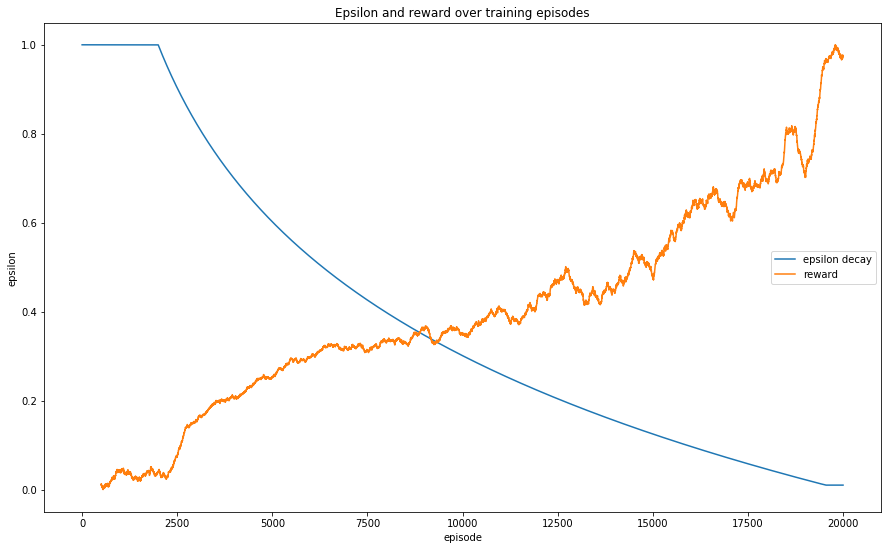

In [140]:
total_episodes = 20000
episodes = np.arange(total_episodes)
# epsilon = np.clip(1.0 - np.log10((episodes + 1) / (total_episodes * 0.1)), 0.1, 1.0)
epsilon = agent.decay_function(episodes, total_episodes)
plt.rcParams['figure.figsize'] = [15, 9]
plt.plot(episodes, epsilon, label='epsilon decay')
plt.plot(episodes, (avg_reward - np.min(avg_reward)) / (np.max(avg_reward) - np.min(avg_reward)), label='reward')
plt.xlabel('episode')
plt.ylabel('epsilon')
plt.legend()
plt.title('Decaying epsilon and reward over training episodes')
plt.show();

---

### Agent performance at the beginning (1000 episodes)
<!-- ![before_training](images/training/before_training.gif) -->

In [17]:
!python evaluate_qtable.py "checkpoints\qtbl_td_e1000.npy" 1

episode: 0/1, score: -241.20748898070224


### Agent performance after 5000 episodes
<!-- ![mid_training](images/training/mid_training.gif) -->

In [18]:
!python evaluate_qtable.py "checkpoints\qtbl_td_e5000.npy" 1

episode: 0/1, score: 15.417350550248727


### Agent performance after 20000 episodes
<!-- ![after_training](images/training/after_training.gif) -->

In [19]:
!python evaluate_qtable.py "checkpoints\qtbl_td_e20000.npy" 5

episode: 0/5, score: 259.7640025699941
episode: 1/5, score: -36.39256813219785
episode: 2/5, score: 243.3580991545515
episode: 3/5, score: 255.34643692943777
episode: 4/5, score: 23.856482720232066


---